In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = yf.download("INFY.NS", period="5y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18660\1956484635.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("INFY.NS", period="5y")
[*********************100%***********************]  1 of 1 completed


In [3]:
print(df.columns) #Detected additional column

MultiIndex([( 'Close', 'INFY.NS'),
            (  'High', 'INFY.NS'),
            (   'Low', 'INFY.NS'),
            (  'Open', 'INFY.NS'),
            ('Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])


In [4]:
df.columns = [col[0] for col in df.columns] #Flatten the dataset to make single column
df.head() 

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-24,635.131042,646.381318,630.906619,637.576762,10220838
2020-06-25,622.991394,627.527070,616.765927,626.860056,14945284
2020-06-26,665.413452,668.437218,631.440181,631.618062,26030458
2020-06-29,650.783691,662.300817,649.316238,654.029850,8954428
2020-06-30,654.518982,657.187039,644.113547,651.717500,10411290


In [5]:
df.isnull().sum() #No NaN values present (Happy happy happy)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

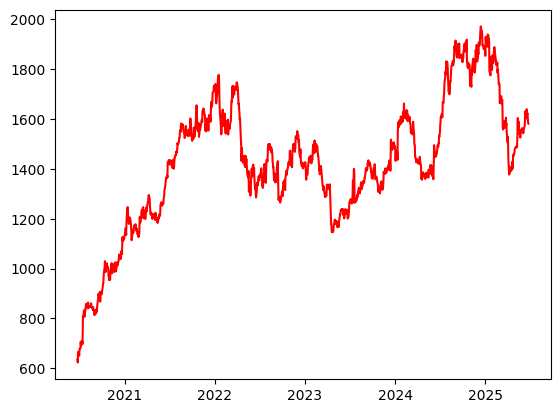

In [6]:
plt.plot(df.index, df["Close"], color="red")

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled #numpy array(can't use reshape, so convert back to Dataframe using pandas)

array([[0.00899925, 0.01395491, 0.01060503, 0.00799215, 0.11302222],
       [0.        , 0.        , 0.        , 0.        , 0.16526524],
       [0.0314479 , 0.03027951, 0.01100518, 0.00354836, 0.28784531],
       ...,
       [0.74124247, 0.74249504, 0.74406615, 0.73990423, 0.10176497],
       [0.71240549, 0.72051272, 0.71894231, 0.72648044, 0.08784132],
       [0.71062632, 0.72643389, 0.71984223, 0.72648044, 0.08937768]],
      shape=(1240, 5))

In [8]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-24,0.008999,0.013955,0.010605,0.007992,0.113022
2020-06-25,0.000000,0.000000,0.000000,0.000000,0.165265
2020-06-26,0.031448,0.030280,0.011005,0.003548,0.287845
2020-06-29,0.020603,0.025738,0.024412,0.020262,0.099018
2020-06-30,0.023372,0.021953,0.020510,0.018538,0.115128
...,...,...,...,...,...
2025-06-18,0.748656,0.752857,0.753141,0.741396,0.062253
2025-06-19,0.737907,0.741977,0.746016,0.743558,0.056924
2025-06-20,0.741242,0.742495,0.744066,0.739904,0.101765


In [9]:
def create_sequences(data, window_size, horizon, target_col_index):
    X = []
    y = []
    for i in range(len(data) - window_size - horizon + 1):
        X_seq = data[i:i+window_size]
        y_value = data[i + window_size + horizon -1, target_col_index]
        X.append(X_seq)
        y.append(y_value)
    return np.array(X), np.array(y)

In [10]:
X, y = create_sequences(scaled_df.values, window_size=40, horizon=3, target_col_index=0)
print(X.shape)
print(y.shape)

(1198, 40, 5)
(1198,)


In [11]:
#we won't use train_test_split because even with shuffle = false, it can randomize the data, we don't want that here
n_total = len(X)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]

X_test = X[n_train + n_val:]
y_test = y[n_train + n_val:]

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(838, 40, 5) (239, 40, 5) (121, 40, 5) (838,) (239,) (121,)


In [12]:
np.save("../data/X_train.npy", X_train)
np.save("../data/y_train.npy", y_train)
np.save("../data/X_val.npy", X_val)
np.save("../data/y_val.npy", y_val)
np.save("../data/X_test.npy", X_test)
np.save("../data/y_test.npy", y_test)